In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config=ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction=0.5
config.gpu_options.allow_growth=True
session=InteractiveSession(config=config)

/usr/local/lib/python3.10/dist-packages/tensorflow/python/client/session.py:1769: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import random
from tqdm import tqdm
import xgboost as xgb
import tensorflow as tf
import cv2
# from keras.applications.resnet18 import ResNet18
from keras.models import Model
from keras.preprocessing import image
from keras.applications.resnet import preprocess_input, decode_predictions
from keras.layers import Flatten, Input
from tensorflow.keras.utils import img_to_array, load_img
import scipy
from sklearn.metrics import fbeta_score
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import xgboost
import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# preprocessing train data
train_datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True) 

In [ ]:
train_path='/content/drive/MyDrive/ML_project/ML_Project/Project/Alzheimer_s Dataset_1/train'
test_path='/content/drive/MyDrive/ML_project/ML_Project/Project/Alzheimer_s Dataset_1/test'

In [ ]:
training_set=train_datagen.flow_from_directory(train_path,
                                               target_size=(150,150),
                                              batch_size=64,
                                              class_mode='categorical')

# ppreprocessing test data
test_datagen=ImageDataGenerator(rescale=1./255)

testing_set=train_datagen.flow_from_directory(test_path,
                                               target_size=(150,150),
                                              batch_size=64,
                                              class_mode='categorical')

Found 5121 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

In [ ]:
cnn=tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32, padding='same',kernel_size=3, activation='relu', strides=2,input_shape=[150,150,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


cnn.add(tf.keras.layers.Conv2D(filters=32, padding='same',kernel_size=3, activation='relu', strides=2,input_shape=[150,150,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# for multiclassification to work with SVM
cnn.add(Dense(4,kernel_regularizer=tf.keras.regularizers.l2(0.01), activation='softmax'))

cnn.compile(tf.keras.optimizers.Adam(learning_rate=0.001), loss='squared_hinge', metrics=['accuracy'])

In [ ]:
# 3
r=cnn.fit(x=training_set, validation_data=testing_set,epochs=50)


Epoch 1/50
81/81 [==============================] - 1544s 19s/step - loss: 1.2428 - accuracy: 0.4962 - val_loss: 1.2127 - val_accuracy: 0.5106
Epoch 2/50
81/81 [==============================] - 56s 696ms/step - loss: 1.2124 - accuracy: 0.5093 - val_loss: 1.2022 - val_accuracy: 0.5004
Epoch 3/50
81/81 [==============================] - 58s 722ms/step - loss: 1.1935 - accuracy: 0.5140 - val_loss: 1.1907 - val_accuracy: 0.5004
Epoch 4/50
81/81 [==============================] - 56s 696ms/step - loss: 1.1669 - accuracy: 0.5407 - val_loss: 1.1900 - val_accuracy: 0.5043
Epoch 5/50
81/81 [==============================] - 58s 716ms/step - loss: 1.1530 - accuracy: 0.5606 - val_loss: 1.1850 - val_accuracy: 0.5020
Epoch 6/50
81/81 [==============================] - 56s 693ms/step - loss: 1.1540 - accuracy: 0.5604 - val_loss: 1.1789 - val_accuracy: 0.5082
Epoch 7/50
81/81 [==============================] - 57s 709ms/step - loss: 1.1507 - accuracy: 0.5653 - val_loss: 1.1676 - val_accuracy: 0.5410

In [ ]:
# 1
r=cnn.fit(x=training_set, validation_data=testing_set,epochs=15)

Epoch 1/15
81/81 [==============================] - 2851s 35s/step - loss: 1.2501 - accuracy: 0.4909 - val_loss: 1.2160 - val_accuracy: 0.5004
Epoch 2/15
81/81 [==============================] - 44s 550ms/step - loss: 1.2026 - accuracy: 0.5112 - val_loss: 1.2048 - val_accuracy: 0.5020
Epoch 3/15
81/81 [==============================] - 45s 555ms/step - loss: 1.1695 - accuracy: 0.5364 - val_loss: 1.1817 - val_accuracy: 0.5059
Epoch 4/15
81/81 [==============================] - 45s 549ms/step - loss: 1.1601 - accuracy: 0.5518 - val_loss: 1.1889 - val_accuracy: 0.5074
Epoch 5/15
81/81 [==============================] - 44s 545ms/step - loss: 1.1671 - accuracy: 0.5474 - val_loss: 1.1843 - val_accuracy: 0.4988
Epoch 6/15
81/81 [==============================] - 44s 547ms/step - loss: 1.1471 - accuracy: 0.5677 - val_loss: 1.1730 - val_accuracy: 0.5301
Epoch 7/15
81/81 [==============================] - 45s 551ms/step - loss: 1.1481 - accuracy: 0.5614 - val_loss: 1.1670 - val_accuracy: 0.5403

In [ ]:
# ?2
r=cnn.fit(x=training_set, validation_data=testing_set,epochs=50)

Epoch 1/50
81/81 [==============================] - 45s 560ms/step - loss: 1.1275 - accuracy: 0.5868 - val_loss: 1.1639 - val_accuracy: 0.5387
Epoch 2/50
81/81 [==============================] - 44s 549ms/step - loss: 1.1170 - accuracy: 0.6096 - val_loss: 1.1490 - val_accuracy: 0.5567
Epoch 3/50
81/81 [==============================] - 44s 550ms/step - loss: 1.1007 - accuracy: 0.6280 - val_loss: 1.1997 - val_accuracy: 0.5129
Epoch 4/50
81/81 [==============================] - 47s 580ms/step - loss: 1.1035 - accuracy: 0.6153 - val_loss: 1.1521 - val_accuracy: 0.5622
Epoch 5/50
81/81 [==============================] - 45s 554ms/step - loss: 1.1020 - accuracy: 0.6218 - val_loss: 1.1617 - val_accuracy: 0.5536
Epoch 6/50
81/81 [==============================] - 45s 554ms/step - loss: 1.0898 - accuracy: 0.6368 - val_loss: 1.1518 - val_accuracy: 0.5684
Epoch 7/50
81/81 [==============================] - 46s 574ms/step - loss: 1.0866 - accuracy: 0.6376 - val_loss: 1.1546 - val_accuracy: 0.5684

In [ ]:
from keras.layers import  Dropout

cnn=tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32, padding='same',kernel_size=3, activation='relu', strides=2,input_shape=[150,150,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


cnn.add(tf.keras.layers.Conv2D(filters=32, padding='same',kernel_size=3, activation='relu', strides=2,input_shape=[150,150,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(Dropout(rate=0.3))
cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=64, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=32, activation='relu'))

cnn.add(Dropout(rate=0.3))

# for multiclassification to work with SVM
cnn.add(Dense(4,kernel_regularizer=tf.keras.regularizers.l2(0.01), activation='softmax'))

cnn.compile(tf.keras.optimizers.SGD(learning_rate=0.01), loss='squared_hinge', metrics=['accuracy'])

In [ ]:
r=cnn.fit(x=training_set, validation_data=testing_set,epochs=50)

Epoch 1/50
81/81 [==============================] - 46s 552ms/step - loss: 1.3749 - accuracy: 0.2361 - val_loss: 1.3721 - val_accuracy: 0.1400
Epoch 2/50
81/81 [==============================] - 45s 559ms/step - loss: 1.3704 - accuracy: 0.2570 - val_loss: 1.3659 - val_accuracy: 0.1431
Epoch 3/50
81/81 [==============================] - 44s 547ms/step - loss: 1.3647 - accuracy: 0.3083 - val_loss: 1.3604 - val_accuracy: 0.3346
Epoch 4/50
81/81 [==============================] - 44s 539ms/step - loss: 1.3600 - accuracy: 0.3394 - val_loss: 1.3548 - val_accuracy: 0.4996
Epoch 5/50
81/81 [==============================] - 44s 545ms/step - loss: 1.3558 - accuracy: 0.3687 - val_loss: 1.3487 - val_accuracy: 0.5004
Epoch 6/50
81/81 [==============================] - 46s 571ms/step - loss: 1.3497 - accuracy: 0.4066 - val_loss: 1.3428 - val_accuracy: 0.5004
Epoch 7/50
81/81 [==============================] - 44s 540ms/step - loss: 1.3447 - accuracy: 0.4232 - val_loss: 1.3364 - val_accuracy: 0.5004

In [ ]:
from keras.layers import  Dropout

cnn=tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32, padding='same',kernel_size=3, activation='relu', strides=2,input_shape=[150,150,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


cnn.add(tf.keras.layers.Conv2D(filters=32, padding='same',kernel_size=3, activation='relu', strides=2,input_shape=[150,150,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(Dropout(rate=0.3))
cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=64, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=32, activation='relu'))

cnn.add(Dropout(rate=0.3))

# for multiclassification to work with SVM
cnn.add(Dense(4,kernel_regularizer=tf.keras.regularizers.l2(0.01), activation='softmax'))

cnn.compile(tf.keras.optimizers.Adam(learning_rate=0.01), loss='squared_hinge', metrics=['accuracy'])

In [ ]:
r=cnn.fit(x=training_set, validation_data=testing_set,epochs=150)

Epoch 1/150
81/81 [==============================] - 49s 553ms/step - loss: 1.2678 - accuracy: 0.4899 - val_loss: 1.2514 - val_accuracy: 0.5004
Epoch 2/150
81/81 [==============================] - 46s 570ms/step - loss: 1.2517 - accuracy: 0.4999 - val_loss: 1.2510 - val_accuracy: 0.5004
Epoch 3/150
81/81 [==============================] - 44s 541ms/step - loss: 1.2520 - accuracy: 0.4993 - val_loss: 1.2508 - val_accuracy: 0.5004
Epoch 4/150
81/81 [==============================] - 44s 547ms/step - loss: 1.2516 - accuracy: 0.5001 - val_loss: 1.2512 - val_accuracy: 0.5004
Epoch 5/150
81/81 [==============================] - 44s 540ms/step - loss: 1.2517 - accuracy: 0.4999 - val_loss: 1.2508 - val_accuracy: 0.5004
Epoch 6/150
81/81 [==============================] - 44s 549ms/step - loss: 1.2512 - accuracy: 0.4999 - val_loss: 1.2505 - val_accuracy: 0.5004
Epoch 7/150
81/81 [==============================] - 45s 549ms/step - loss: 1.2508 - accuracy: 0.4999 - val_loss: 1.2503 - val_accuracy:

KeyboardInterrupt: ignored

In [ ]:
# casee after tuning
# case after splitting folders

In [ ]:
# after tunning hidden layers
!pip install -U keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 7.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import hyperparameters
import time

<ipython-input-6-97400e88a067>:4: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [ ]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
LOG_DIR=f"{int(time.time())}"

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Activation

In [ ]:

def model_build(hp):
  model = keras.models.Sequential()

  model.add(Conv2D(hp.Int("input_units", min_value=32, max_value=256,step=32), (3, 3), input_shape=[150,150,3]))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  for i in range(hp.Int("n_layers", 1, 4)):
    model.add(Conv2D(hp.Int(f"conv_{i}_units", min_value=32, max_value=256,step=32), (3, 3)))
    model.add(Activation('relu'))

  model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

  model.add(Dense(10))
  model.add(Dense(4,kernel_regularizer=tf.keras.regularizers.l2(0.01), activation='softmax'))

  model.compile(tf.keras.optimizers.Adam(learning_rate=0.01), loss='squared_hinge', metrics=['accuracy'])
  return model

In [ ]:
tuner=RandomSearch(
    model_build,
    objective='val_accuracy',
    max_trials=1,
    executions_per_trial=1,
    directory=LOG_DIR
)

tuner.search(x=training_set, epochs=1, batch_size=64,validation_data=testing_set)

Trial 1 Complete [00h 00m 56s]
val_accuracy: 0.5003909468650818

Best val_accuracy So Far: 0.5003909468650818
Total elapsed time: 00h 00m 56s


In [ ]:
import os        
import numpy as np # linear algebra
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import PIL
import PIL.Image
from tensorflow import keras
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

In [ ]:
# case 5 using habiba's CNN

import matplotlib.pyplot as plt




def train_test():
    
    # Defines & compiles the model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(48, 48, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    keras.layers.Dropout(rate=0.15), #adding dropout regularization throughout the model to deal with overfitting
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(rate=0.1),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(rate=0.10),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),

    # 4 output neuron for the 4 classes of Alzhemir Images
    tf.keras.layers.Dense(4,kernel_regularizer=tf.keras.regularizers.l2(0.01), activation='softmax')

    ])

   

    model.compile(tf.keras.optimizers.Adam(learning_rate=0.001), loss='squared_hinge', metrics=['accuracy'])

        

    # Creates an instance of an ImageDataGenerator called train_datagen, and a train_generator, train_datagen.flow_from_directory

    

    #splits data into training and testing(validation) sets
    train_datagen =ImageDataGenerator(rescale=1./255,)
   
    #training data
    train_generator = train_datagen.flow_from_directory(
    directory=r"/content/drive/MyDrive/ML_project/ML_Project/Project/Alzheimer_s Dataset_1/train/",
    target_size=(48, 48),
    color_mode="grayscale",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42
    )

    epochs = 50
    #Testing data
    validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/ML_project/ML_Project/Project/Alzheimer_s Dataset_1//test/',
    target_size=(48, 48),
    color_mode="grayscale",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42) # set as validation data
       
    #Model fitting for a number of epochs
    history = model.fit(
      train_generator,
      steps_per_epoch=int(5121/32),
      epochs=epochs,
      validation_data = validation_generator,
      validation_steps = int(1279/32),
      verbose=1)
    
        
    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    #This code is used to plot the training and validation accuracy
    epochs_range = range(epochs)
    plt.plot(history.history['accuracy'],history.history['val_accuracy'])
    #plt.plot()
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    plt.plot(history.history['loss'],history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
  
    '''
    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()
    '''
    # returns accuracy of training
    print("Training Accuracy:"), print(history.history['accuracy'][-1])
    print("Testing Accuracy:"), print (history.history['val_accuracy'][-1])

    

Found 5121 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.
Epoch 1/50
160/160 [==============================] - 1546s 10s/step - loss: 1.2155 - accuracy: 0.4942 - val_loss: 1.2238 - val_accuracy: 0.5032
Epoch 2/50
160/160 [==============================] - 13s 84ms/step - loss: 1.1729 - accuracy: 0.5260 - val_loss: 1.1789 - val_accuracy: 0.5144
Epoch 3/50
160/160 [==============================] - 14s 85ms/step - loss: 1.1491 - accuracy: 0.5545 - val_loss: 1.1529 - val_accuracy: 0.5441
Epoch 4/50
160/160 [==============================] - 13s 81ms/step - loss: 1.1324 - accuracy: 0.5734 - val_loss: 1.1646 - val_accuracy: 0.5272
Epoch 5/50
160/160 [==============================] - 13s 84ms/step - loss: 1.1270 - accuracy: 0.5895 - val_loss: 1.1713 - val_accuracy: 0.5144
Epoch 6/50
160/160 [==============================] - 13s 83ms/step - loss: 1.1160 - accuracy: 0.6109 - val_loss: 1.1443 - val_accuracy: 0.5264
Epoch 7/50
160/160 [==============================]

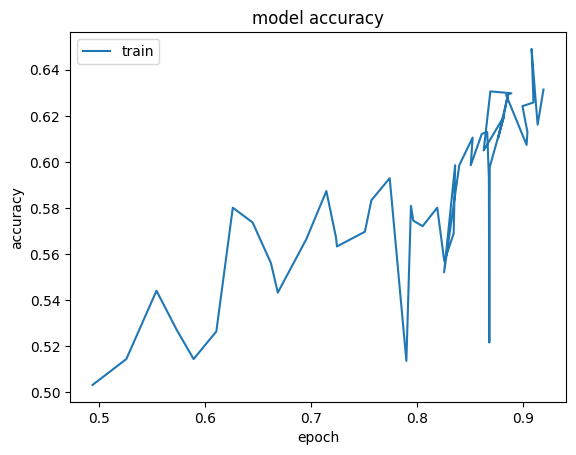

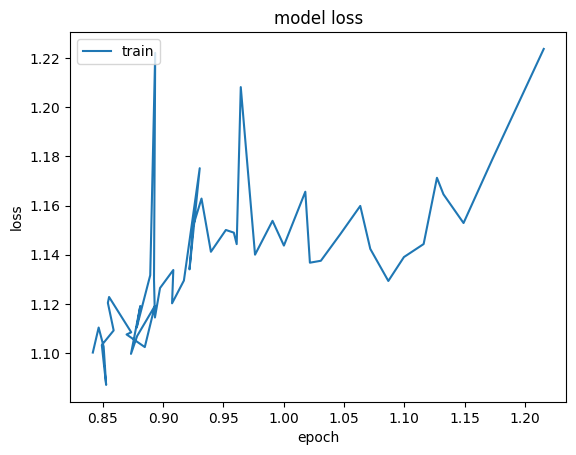

Training Accuracy:
0.9194340705871582
Testing Accuracy:
0.6314102411270142


In [ ]:
train_test()

In [ ]:
# case 6 more epochs

import matplotlib.pyplot as plt




def train_test():
    
    # Defines & compiles the model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(48, 48, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    keras.layers.Dropout(rate=0.15), #adding dropout regularization throughout the model to deal with overfitting
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(rate=0.1),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(rate=0.10),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),

    # 4 output neuron for the 4 classes of Alzhemir Images
    tf.keras.layers.Dense(4,kernel_regularizer=tf.keras.regularizers.l2(0.01), activation='softmax')

    ])

   

    model.compile(tf.keras.optimizers.Adam(learning_rate=0.001), loss='squared_hinge', metrics=['accuracy'])

        

    # Creates an instance of an ImageDataGenerator called train_datagen, and a train_generator, train_datagen.flow_from_directory

    

    #splits data into training and testing(validation) sets
    train_datagen =ImageDataGenerator(rescale=1./255,)
   
    #training data
    train_generator = train_datagen.flow_from_directory(
    directory=r"/content/drive/MyDrive/ML_project/ML_Project/Project/Alzheimer_s Dataset_1/train/",
    target_size=(48, 48),
    color_mode="grayscale",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42
    )

    epochs = 150
    #Testing data
    validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/ML_project/ML_Project/Project/Alzheimer_s Dataset_1//test/',
    target_size=(48, 48),
    color_mode="grayscale",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42) # set as validation data
       
    #Model fitting for a number of epochs
    history = model.fit(
      train_generator,
      steps_per_epoch=int(5121/32),
      epochs=epochs,
      validation_data = validation_generator,
      validation_steps = int(1279/32),
      verbose=1)
    
        
    
    

In [ ]:
train_test()

Found 5121 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.
Epoch 1/150
160/160 [==============================] - 17s 86ms/step - loss: 1.2273 - accuracy: 0.4975 - val_loss: 1.1708 - val_accuracy: 0.5184
Epoch 2/150
160/160 [==============================] - 14s 85ms/step - loss: 1.1580 - accuracy: 0.5421 - val_loss: 1.1565 - val_accuracy: 0.5272
Epoch 3/150
160/160 [==============================] - 13s 84ms/step - loss: 1.1520 - accuracy: 0.5482 - val_loss: 1.1737 - val_accuracy: 0.5152
Epoch 4/150
160/160 [==============================] - 15s 95ms/step - loss: 1.1306 - accuracy: 0.5801 - val_loss: 1.1399 - val_accuracy: 0.5753
Epoch 5/150
160/160 [==============================] - 13s 83ms/step - loss: 1.1268 - accuracy: 0.5852 - val_loss: 1.1384 - val_accuracy: 0.5753
Epoch 6/150
160/160 [==============================] - 13s 84ms/step - loss: 1.1133 - accuracy: 0.6027 - val_loss: 1.1293 - val_accuracy: 0.5745
Epoch 7/150
160/160 [=========================

In [ ]:
# case 7 more epochs, verbose=2
# learning rate

import matplotlib.pyplot as plt




def train_test():
    
    # Defines & compiles the model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(48, 48, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    keras.layers.Dropout(rate=0.15), #adding dropout regularization throughout the model to deal with overfitting
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(rate=0.1),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(rate=0.10),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),

    # 4 output neuron for the 4 classes of Alzhemir Images
    tf.keras.layers.Dense(4,kernel_regularizer=tf.keras.regularizers.l2(0.01), activation='softmax')

    ])

   

    model.compile(tf.keras.optimizers.Adam(learning_rate=0.001), loss='squared_hinge', metrics=['accuracy'])

        

    # Creates an instance of an ImageDataGenerator called train_datagen, and a train_generator, train_datagen.flow_from_directory

    

    #splits data into training and testing(validation) sets
    train_datagen =ImageDataGenerator(rescale=1./255,)
   
    #training data
    train_generator = train_datagen.flow_from_directory(
    directory=r"/content/drive/MyDrive/ML_project/ML_Project/Project/Alzheimer_s Dataset_1/train/",
    target_size=(48, 48),
    color_mode="grayscale",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42
    )

    epochs = 150
    #Testing data
    validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/ML_project/ML_Project/Project/Alzheimer_s Dataset_1//test/',
    target_size=(48, 48),
    color_mode="grayscale",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42) # set as validation data
       
    #Model fitting for a number of epochs
    history = model.fit(
      train_generator,
      steps_per_epoch=int(5121/32),
      epochs=epochs,
      validation_data = validation_generator,
      validation_steps = int(1279/32),
      verbose=2)
    
        
    
    

In [ ]:
train_test()

Found 5121 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.
Epoch 1/150
160/160 - 17s - loss: 1.2190 - accuracy: 0.4928 - val_loss: 1.1852 - val_accuracy: 0.5032 - 17s/epoch - 104ms/step
Epoch 2/150
160/160 - 15s - loss: 1.1731 - accuracy: 0.5298 - val_loss: 1.1567 - val_accuracy: 0.5417 - 15s/epoch - 95ms/step
Epoch 3/150
160/160 - 13s - loss: 1.1545 - accuracy: 0.5443 - val_loss: 1.1598 - val_accuracy: 0.5337 - 13s/epoch - 81ms/step
Epoch 4/150
160/160 - 13s - loss: 1.1419 - accuracy: 0.5628 - val_loss: 1.1554 - val_accuracy: 0.5473 - 13s/epoch - 80ms/step
Epoch 5/150
160/160 - 14s - loss: 1.1245 - accuracy: 0.5897 - val_loss: 1.1467 - val_accuracy: 0.5385 - 14s/epoch - 87ms/step
Epoch 6/150
160/160 - 13s - loss: 1.1140 - accuracy: 0.6048 - val_loss: 1.1572 - val_accuracy: 0.5401 - 13s/epoch - 78ms/step
Epoch 7/150
160/160 - 13s - loss: 1.0962 - accuracy: 0.6278 - val_loss: 1.1793 - val_accuracy: 0.5312 - 13s/epoch - 80ms/step
Epoch 8/150
160/160 - 15s - loss:

In [2]:
# case 9 more epochs, verbose=2, filter = 32 ,32 , 64 , drop rate , 30%
# no learning rate

import matplotlib.pyplot as plt




def train_test():
    
    # Defines & compiles the model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(48, 48, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    keras.layers.Dropout(rate=0.30), #adding dropout regularization throughout the model to deal with overfitting
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(rate=0.30),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(rate=0.30),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),

    # 4 output neuron for the 4 classes of Alzhemir Images
    tf.keras.layers.Dense(4,kernel_regularizer=tf.keras.regularizers.l2(0.01), activation='softmax')

    ])

   

    model.compile(optimizer='adam', loss='squared_hinge', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

        

    # Creates an instance of an ImageDataGenerator called train_datagen, and a train_generator, train_datagen.flow_from_directory

    

    #splits data into training and testing(validation) sets
    train_datagen =ImageDataGenerator(rescale=1./255,)
   
    #training data
    train_generator = train_datagen.flow_from_directory(
    directory=r"/content/drive/MyDrive/ML_project/ML_Project/Project/Alzheimer_s Dataset_1/train/",
    target_size=(48, 48),
    color_mode="grayscale",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42
    )

    epochs = 150
    #Testing data
    validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/ML_project/ML_Project/Project/Alzheimer_s Dataset_1//test/',
    target_size=(48, 48),
    color_mode="grayscale",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42) # set as validation data
       
    #Model fitting for a number of epochs
    history = model.fit(
      train_generator,
      steps_per_epoch=int(5121/32),
      epochs=epochs,
      validation_data = validation_generator,
      validation_steps = int(1279/32),
      verbose=2)
    
        
    
    

In [27]:
train_test()

Found 5121 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.
Epoch 1/150
160/160 - 734s - loss: 1.2221 - accuracy: 0.4983 - precision_4: 0.5066 - recall_4: 0.4783 - val_loss: 1.1938 - val_accuracy: 0.5024 - val_precision_4: 0.5032 - val_recall_4: 0.5024 - 734s/epoch - 5s/step
Epoch 2/150
160/160 - 26s - loss: 1.1654 - accuracy: 0.5274 - precision_4: 0.5445 - recall_4: 0.4885 - val_loss: 1.1608 - val_accuracy: 0.5152 - val_precision_4: 0.5714 - val_recall_4: 0.4359 - 26s/epoch - 165ms/step
Epoch 3/150
160/160 - 28s - loss: 1.1473 - accuracy: 0.5475 - precision_4: 0.5756 - recall_4: 0.4842 - val_loss: 1.1465 - val_accuracy: 0.5689 - val_precision_4: 0.5898 - val_recall_4: 0.5208 - 28s/epoch - 174ms/step
Epoch 4/150
160/160 - 28s - loss: 1.1376 - accuracy: 0.5687 - precision_4: 0.5850 - recall_4: 0.5227 - val_loss: 1.1453 - val_accuracy: 0.5729 - val_precision_4: 0.6770 - val_recall_4: 0.4199 - 28s/epoch - 174ms/step
Epoch 5/150
160/160 - 28s - loss: 1.1358 - accura